# MNIST with Multi-Layer Perceptron

In [171]:
import tensorflow as tf

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [173]:
from tensorflow.examples.tutorials.mnist import input_data

In [174]:
# Create a variable with a temporary file for this data
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [175]:
# Let's see how its stored
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [176]:
mnist.train.images.shape

(55000, 784)

In [177]:
# Let's see this image
sample = mnist.train.images[999].reshape(28,28)

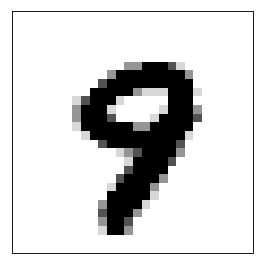

In [178]:
plt.figure(dpi=80)
plt.imshow(sample, cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()

# Let's define the basics parameters

In [179]:
learning_rate = 0.001     # How quickly we adjust the cost function
training_epochs = 45
batch_size = 100

In [180]:
n_classes = 10    # 0 to 9
n_samples = mnist.train.num_examples     #55000

In [181]:
# Flatten shape of the handwritten digits image (28x28)
n_input = 784

In [182]:
# Let's define the shape of our neural network (bigger it is, longer it is to train)
n_hidden_1 = 256
n_hidden_2 = 256

# Let's build this model!

In [183]:
def multilayer_perceptron(x, weights, biases):
    """
    x: Placeholder for data input
    weights: Dict of weights
    biases: Dict of biases values
    """
    
    # First hidden layer with RELU activation
    # X * W + b
    layer_1 = tf.add(tf.matmul(x,weights["h1"]), biases["b1"])
    # RELU(X * W + b) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second layer
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biaises["b2"])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.add(tf.matmul(layer_2, weights["out"]), biases["out"])
    
    return out_layer

## tf.variable
A tf.variable is a modifiable tensor that live in tensorflow graphs of interactions and can be use and modify in computations

In [184]:
# Let's create the weights dictionary
weights = {
    # Matrix of normally distributed values (n_input rows by n_hidden_1 columns)
    "h1": tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    # Matrix of normally distributed values (n_hidden_1 rows by n_hidden_2 columns)
    "h2": tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    # Matrix of normally distributed values (n_hidden_2 rows by n_classes)
    "out": tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [185]:
# Let's create the biais dictionary
biases = {
    "b1": tf.Variable(tf.random_normal([n_hidden_1])),
    "b2": tf.Variable(tf.random_normal([n_hidden_2])),
    "out": tf.Variable(tf.random_normal([n_classes]))
}

In [186]:
# Set placeholders for x and y

x = tf.placeholder("float", [None, n_input])

y = tf.placeholder("float", [None, n_classes])

In [187]:
# pred = multilayer_perceptron(x, weights, biaises)

pred = multilayer_perceptron(x, weights, biases)

## Cost + Optimization function

In [188]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [189]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Training the Model

In [190]:
t = mnist.train.next_batch(1)

In [191]:
Xsamp, ysamp = t

In [192]:
tf.argmax(ysamp,1)

<tf.Tensor 'ArgMax_12:0' shape=(1,) dtype=int64>

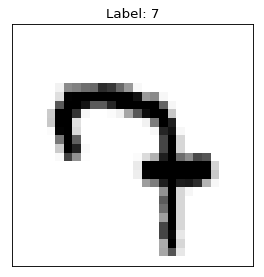

In [193]:
plt.figure(dpi=80)
plt.imshow(Xsamp.reshape(28,28), cmap='Greys')
plt.title("Label: {}".format(ysamp.argmax()))
plt.xticks([])
plt.yticks([])
plt.show()

## Run the session

In [194]:
# Use interactive session
sess = tf.InteractiveSession()

In [195]:
# Initialize all the variables
init = tf.global_variables_initializer()

In [196]:
sess.run(init)

In [197]:
# 15 loops
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    # Convert the total num of batches (number of batches we have to run) into integer
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost: {:.4f}".format(epoch+1, avg_cost))
    
print("Models has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost: 149.6697
Epoch: 2 cost: 40.2604
Epoch: 3 cost: 24.9755
Epoch: 4 cost: 17.2530
Epoch: 5 cost: 12.3407
Epoch: 6 cost: 9.2374
Epoch: 7 cost: 6.7103
Epoch: 8 cost: 4.9345
Epoch: 9 cost: 3.5578
Epoch: 10 cost: 2.7305
Epoch: 11 cost: 1.9642
Epoch: 12 cost: 1.5122
Epoch: 13 cost: 1.1965
Epoch: 14 cost: 0.9176
Epoch: 15 cost: 0.7464
Epoch: 16 cost: 0.5953
Epoch: 17 cost: 0.4995
Epoch: 18 cost: 0.5458
Epoch: 19 cost: 0.4707
Epoch: 20 cost: 0.4623
Epoch: 21 cost: 0.3683
Epoch: 22 cost: 0.3841
Epoch: 23 cost: 0.3247
Epoch: 24 cost: 0.2490
Epoch: 25 cost: 0.3089
Epoch: 26 cost: 0.3483
Epoch: 27 cost: 0.2632
Epoch: 28 cost: 0.2977
Epoch: 29 cost: 0.2141
Epoch: 30 cost: 0.2594
Epoch: 31 cost: 0.2270
Epoch: 32 cost: 0.2575
Epoch: 33 cost: 0.2129
Epoch: 34 cost: 0.2630
Epoch: 35 cost: 0.1936
Epoch: 36 cost: 0.2274
Epoch: 37 cost: 0.2000
Epoch: 38 cost: 0.2551
Epoch: 39 cost: 0.1483
Epoch: 40 cost: 0.1890
Epoch: 41 cost: 0.2680
Epoch: 42 cost: 0.1656
Epoch: 43 cost: 0.1481
Epoch: 44 cost

## Model Evaluation Time!

In [198]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [199]:
print(correct_predictions)

Tensor("Equal_1:0", shape=(?,), dtype=bool)


In [200]:
# Let's take the average of correct predictions
correct_predictions = tf.cast(correct_predictions, "float")

In [201]:
correct_predictions

<tf.Tensor 'Cast_5:0' shape=(?,) dtype=float32>

In [202]:
accuracy = tf.reduce_mean(correct_predictions)

In [203]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [204]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [205]:
# Evaluate the tensor
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.96210003